In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import nltk
nltk.download('stopwords')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'all_tickets.csv']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daniele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
dfTickets = pd.read_csv('input/all_tickets.csv')
dfTickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
title               47837 non-null object
body                48549 non-null object
ticket_type         48549 non-null int64
category            48549 non-null int64
sub_category1       48549 non-null int64
sub_category2       48549 non-null int64
business_service    48549 non-null int64
urgency             48549 non-null int64
impact              48549 non-null int64
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [13]:
dfTickets.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [14]:
dfTickets['category'].unique()

array([ 4,  6,  5,  7, 11,  1,  8, 12,  3,  9,  0, 10,  2], dtype=int64)

In [15]:
dfTickets.shape

(48549, 9)

In [16]:
dfTickets = dfTickets[dfTickets['category'] != 0]
dfTickets = dfTickets[dfTickets['category'] != 2]
dfTickets = dfTickets[dfTickets['category'] != 10]

In [17]:
dfTickets.shape

(48540, 9)

### Data Analysis

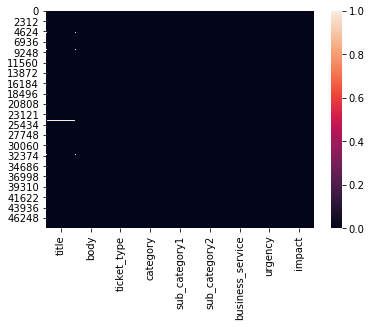

In [18]:
sns.heatmap(dfTickets.isnull())

In [19]:
dfTickets.isnull().sum()

title               712
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64

In [20]:
newdf = dfTickets.select_dtypes([np.number])
newdf.columns.values


array(['ticket_type', 'category', 'sub_category1', 'sub_category2',
       'business_service', 'urgency', 'impact'], dtype=object)

In [21]:
dfTickets['ticket_type'].value_counts()

1    34615
0    13925
Name: ticket_type, dtype: int64

In [22]:
dfTickets['category'].value_counts()

4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
Name: category, dtype: int64

In [ ]:
dfTickets['sub_category1'].value_counts()

In [ ]:
len(dfTickets['sub_category1'].value_counts())

In [ ]:
dfTickets['sub_category2'].value_counts()

In [ ]:
len(dfTickets['sub_category2'].value_counts())

In [ ]:
dfTickets['business_service'].value_counts()


In [ ]:
dfTickets['urgency'].value_counts()


In [ ]:
dfTickets['impact'].value_counts()


In [ ]:
dfTickets['title'].isna().sum()

In [ ]:
dfTickets['body'].isna().sum()

In [ ]:
dfTickets.shape

### Data preprocessing and preparation

In [23]:
Y= pd.DataFrame(dfTickets['category'])

In [25]:
Y.head()

,category
0,4
1,6
2,5
3,5
4,4


In [26]:
X = dfTickets.drop(columns=["title","category"])

In [27]:
print(type(Y))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
X.head()

,body,ticket_type,sub_category1,sub_category2,business_service,urgency,impact
0,hi since recruiter lead permission approve req...,1,2,21,71,3,4
1,icon dear please setup icon per icon engineers...,1,22,7,26,3,4
2,work experience user hi work experience studen...,1,13,7,32,3,4
3,requesting meeting hi please help follow equip...,1,13,7,32,3,4
4,re expire days hi ask help update passwords co...,1,2,76,4,3,4


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X['body'], Y, test_size=0.1, random_state=0)


In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(43686,)
(43686, 1)
(4854,)
(4854, 1)


In [31]:
X_train.head()

38065    failed sign hello there seems be issue with si...
39653    profile incorrect blocker for activities accur...
14716    wednesday pm update dear please update name ac...
21255    wednesday february pm re analysis discipline m...
34218    friday july pm re mailbox almost hello guys pl...
Name: body, dtype: object

In [32]:
y_train.head()

,category
38065,4
39653,4
14716,4
21255,4
34218,4


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_tf = cv.fit_transform(X_train)
X_train_tf.shape

(43686, 11927)

In [34]:
print(X_train_tf)

  (0, 3996)	1
  (0, 9671)	6
  (0, 4884)	1
  (0, 10697)	1
  (0, 9461)	2
  (0, 941)	1
  (0, 5659)	1
  (0, 11783)	1
  (0, 7671)	1
  (0, 11005)	1
  (0, 11382)	1
  (0, 11381)	1
  (0, 9135)	2
  (0, 9664)	2
  (0, 1374)	2
  (0, 3612)	1
  (0, 7411)	1
  (0, 1820)	1
  (0, 1372)	1
  (0, 5460)	1
  (0, 6101)	1
  (0, 7147)	1
  (0, 6260)	1
  (0, 4984)	1
  (0, 8526)	1
  :	:
  (43684, 1543)	1
  (43684, 6617)	1
  (43684, 1669)	1
  (43685, 2914)	1
  (43685, 8609)	1
  (43685, 5771)	1
  (43685, 11502)	2
  (43685, 4914)	1
  (43685, 4885)	1
  (43685, 804)	1
  (43685, 10583)	1
  (43685, 9543)	1
  (43685, 9877)	1
  (43685, 2004)	1
  (43685, 9624)	1
  (43685, 6929)	1
  (43685, 6407)	1
  (43685, 3745)	2
  (43685, 11082)	1
  (43685, 4784)	2
  (43685, 8041)	1
  (43685, 9883)	1
  (43685, 11637)	2
  (43685, 7378)	1
  (43685, 10186)	1


In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf= tfidf_transformer.fit_transform(X_train_tf)
X_train_tfidf.shape

(43686, 11927)

### Training and evaluation

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, classification_report
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

c:\users\daniele\documents\python-workspace\venv\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
X_test_tf = cv.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)
pred = mnb.predict(X_test_tfidf)


In [42]:
#print(f1_score(y_test, pred))
print(accuracy_score(y_test, pred))
#print(precision_score(y_test, pred))
confusion_matrix(y_test, pred)

0.8166460651009477


array([[   0,    0,    5,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    7,    2,    0,    0,    0,    0,    0,    0],
       [   0,    0, 3353,   46,    5,    0,    0,    0,    0,    0],
       [   0,    0,  380,  577,    1,    0,    0,    0,    0,    0],
       [   0,    0,  219,   21,   25,    0,    1,    0,    0,    0],
       [   0,    0,  110,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   18,    1,    2,    0,    6,    0,    0,    0],
       [   0,    0,    9,    7,    0,    0,    0,    0,    0,    0],
       [   0,    0,   50,    1,    2,    0,    0,    0,    3,    0],
       [   0,    0,    3,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9
           4       0.81      0.99      0.89      3404
           5       0.88      0.60      0.72       958
           6       0.71      0.09      0.17       266
           7       0.00      0.00      0.00       110
           8       0.86      0.22      0.35        27
           9       0.00      0.00      0.00        16
          11       1.00      0.05      0.10        56
          12       0.00      0.00      0.00         3

    accuracy                           0.82      4854
   macro avg       0.43      0.20      0.22      4854
weighted avg       0.80      0.82      0.78      4854



c:\users\daniele\documents\python-workspace\venv\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier().fit(X_train_tfidf, y_train)
predicted1 = sgd_clf.predict(X_test_tfidf)

c:\users\daniele\documents\python-workspace\venv\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#print(f1_score(y_test, pred))
print(accuracy_score(y_test, predicted1))
#print(precision_score(y_test, predicted1))
confusion_matrix(y_test, predicted1)

0.8374536464771323


array([[   0,    0,    5,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    7,    2,    0,    0,    0,    0,    0,    0],
       [   0,    0, 3305,   71,   13,   11,    0,    0,    4,    0],
       [   0,    0,  314,  638,    5,    1,    0,    0,    0,    0],
       [   0,    0,  185,   32,   44,    0,    3,    0,    2,    0],
       [   0,    0,   76,    3,    0,   30,    0,    0,    1,    0],
       [   0,    0,    6,    0,    3,    0,   18,    0,    0,    0],
       [   0,    0,    6,    9,    0,    0,    0,    1,    0,    0],
       [   0,    0,   23,    3,    1,    0,    0,    0,   29,    0],
       [   0,    0,    3,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [50]:
print('***Stemming***')

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')
X_train_counts = stemmed_count_vect.fit_transform(X_train)


from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf= tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
X_test_tf = stemmed_count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)
pred = mnb.predict(X_test_tfidf)
print('MultinomialNB')
#print(round(f1_score(y_test, pred),2))
print(round(accuracy_score(y_test, pred),2))

***Stemming***
MultinomialNB
0.82


**Without Stemming**
F1 Score : 0.99
Accuracy Score : 0.99

**With Stemming**
F1 Score : 0.97
Accuracy Score : 0.96
